In [1]:
import xarray as xr

import functions.eddy_feedback as ef 
import functions.plotting as plot

In [2]:
# JASMIN
# ds = xr.open_mfdataset('/home/users/cturrell/documents/eddy_feedback/daily_datasets/jra55_djf_ep.nc',
#                           parallel=True, chunks={'time': 31})

# Maths2
ds = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/jra55_daily/djf_datasets/jra55_djf_uvtw_ubar_ep.nc',
                            parallel=True, chunks={'time': 31})
ds

<xarray.Dataset>
Dimensions:  (time: 5325, lon: 144, lat: 73, level: 37)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01T09:00:00 ... 2016-12-31T09:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
Data variables:
    v        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    t        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    omega    (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    u        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    ep1      (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    ep2      (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    div1     (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    div2     (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    ubar     (time, level, lat) float32 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>

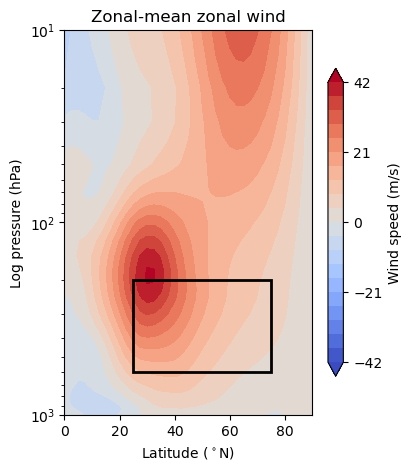

In [3]:
plot.plot_ubar(ds, latitude='NH', show_rect=True, yscale='log', top_atmos=10., figsize=(10,5))

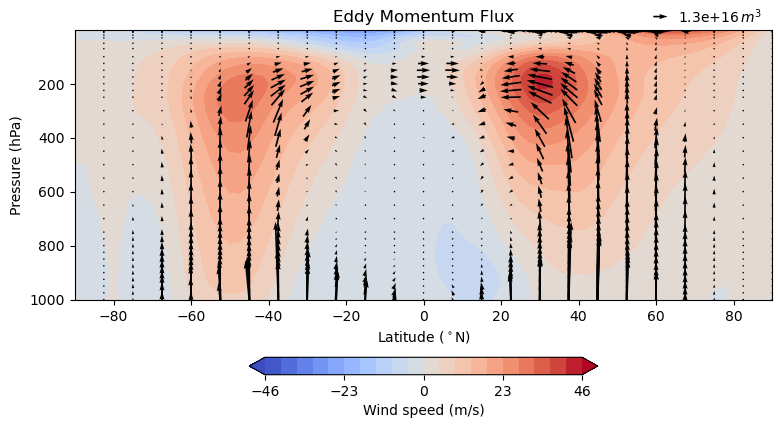

In [4]:
plot.plot_ubar_epflux(ds, skip_lat=3, figsize=(9,5), label='Eddy Momentum Flux')

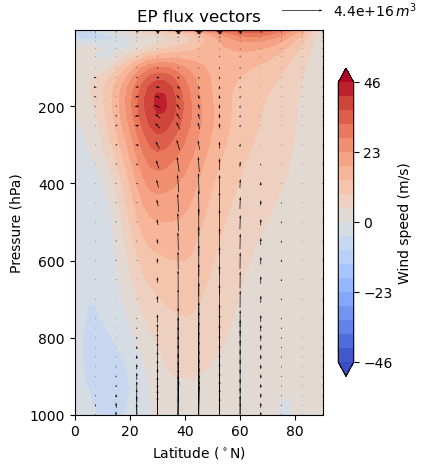

In [8]:
plot.plot_ubar_epflux(ds, skip_lat=3, figsize=(4,5), latitude='NH', label='EP flux vectors', arrow_loc=(0.999,1.05))

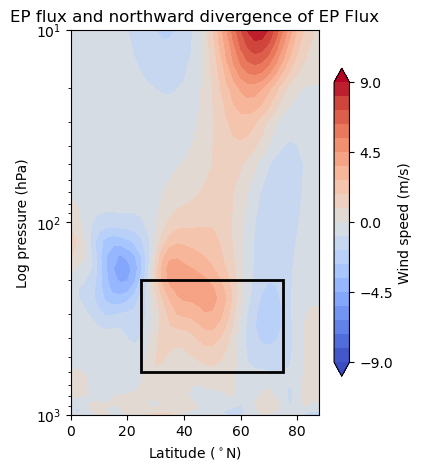

In [7]:
plot.plot_epfluxes_div(ds, skip_lat=2, latitude='NH', show_rect=True, yscale='log', plot_arrows=False, top_atmos=10.)

In [8]:
# plot.correlation_contourf(ds)

# Issues

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import functions.aos_functions as aos

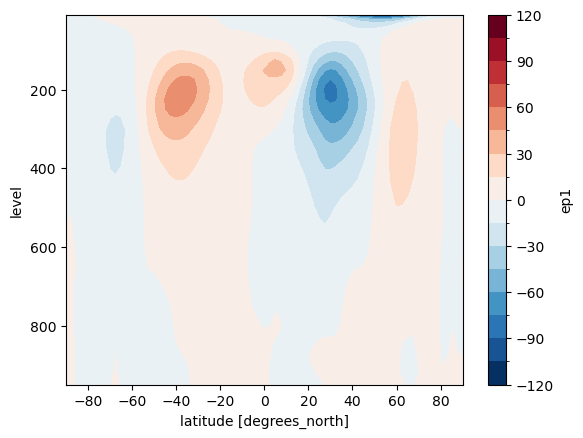

In [10]:
ds = ds.sel(level=slice(10, 950))

ds.ep1.mean('time').plot.contourf(levels=20, yincrease=False)

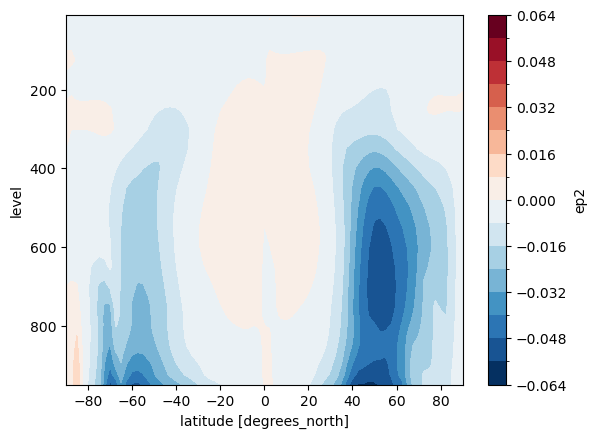

In [11]:
ds.ep2.mean('time').plot.contourf(levels=20, yincrease=False)

In [12]:
ds.ep1

<xarray.DataArray 'ep1' (time: 5325, level: 30, lat: 73)>
dask.array<getitem, shape=(5325, 30, 73), dtype=float64, chunksize=(31, 30, 73), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01T09:00:00 ... 2016-12-31T09:00:00
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 10.0 20.0 30.0 50.0 ... 875.0 900.0 925.0 950.0

In [13]:
ds.ep2

<xarray.DataArray 'ep2' (time: 5325, level: 30, lat: 73)>
dask.array<getitem, shape=(5325, 30, 73), dtype=float64, chunksize=(31, 30, 73), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01T09:00:00 ... 2016-12-31T09:00:00
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 10.0 20.0 30.0 50.0 ... 875.0 900.0 925.0 950.0